In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.graph_objects as go
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('prices.csv')

In [3]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [4]:
df_nvda = df.loc[df['symbol'] == 'NVDA']

In [5]:
df_nvda.head()

,date,symbol,open,close,low,high,volume
566,2010-01-04,NVDA,18.510000,18.490000,18.110001,18.620001,20005100.0
1034,2010-01-05,NVDA,18.420000,18.760000,18.420000,18.959999,18216200.0
1502,2010-01-06,NVDA,18.750000,18.879999,18.570000,18.920000,16229200.0
1970,2010-01-07,NVDA,18.780001,18.510000,18.370001,18.860001,13694800.0
2438,2010-01-08,NVDA,18.360001,18.549999,18.250000,18.680000,11954200.0


In [6]:
df_nvda['date'] = pd.to_datetime(df_nvda['date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [7]:
df_nvda = df_nvda.drop('symbol', axis=1)

In [8]:
df_nvda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1762 entries, 566 to 851100
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1762 non-null   datetime64[ns]
 1   open    1762 non-null   float64       
 2   close   1762 non-null   float64       
 3   low     1762 non-null   float64       
 4   high    1762 non-null   float64       
 5   volume  1762 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 96.4 KB


In [9]:
df_nvda.isnull().sum()

date      0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [10]:
fig = go.Figure(data=[go.Candlestick(x=df_nvda['date'],
                open=df_nvda['open'],
                high=df_nvda['high'],
                low=df_nvda['low'],
                close=df_nvda['close'])])

fig.show()

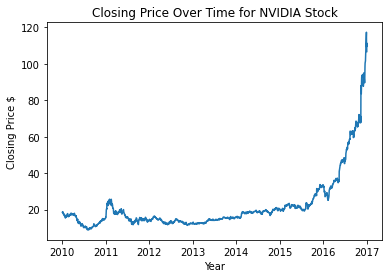

In [11]:
plt.plot(df_nvda['date'], df_nvda['close'])
plt.xlabel('Year')
plt.ylabel('Closing Price $')
plt.title('Closing Price Over Time for NVIDIA Stock')
plt.show()

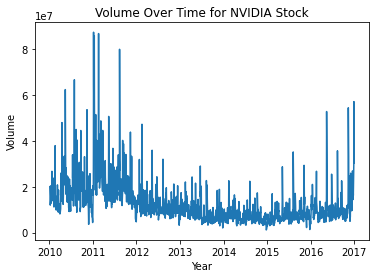

In [12]:
plt.plot(df_nvda['date'], df_nvda['volume'])
plt.xlabel('Year')
plt.ylabel('Volume')
plt.title('Volume Over Time for NVIDIA Stock')
plt.show()

In [13]:
df_nvda['year'] = df_nvda['date'].dt.year

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



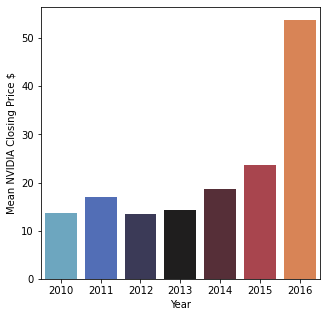

In [14]:
x = df_nvda.groupby("year")['close'].mean().sort_values(ascending = False).head(10)
plt.figure(figsize=(5,5))
ax = sns.barplot(x.index, x.values, palette = 'icefire')
ax.set_xlabel("Year")
ax.set_ylabel("Mean NVIDIA Closing Price $")
plt.show()

In [15]:
X = df_nvda.drop(['close','date'], axis=1)
Y = df_nvda[['close']]

In [16]:
xtraining, xtesting, ytraining, ytesting = train_test_split(X, Y, test_size = 0.25, random_state=1)

In [17]:
regression_model = LinearRegression()

In [18]:
regression_model.fit(xtraining,ytraining)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
regression_model.score(xtraining, ytraining)

0.9998096155557084

In [20]:
regression_model.score(xtesting, ytesting)

0.999791644065341

In [21]:
training_data = pd.concat([xtraining, ytraining], axis=1)
testing_data = pd.concat([xtesting, ytesting], axis=1)

In [22]:
xtraining.head()

,open,low,high,volume,year
788101,46.750000,46.500000,47.360001,5462200.0,2016
319397,13.550000,13.420000,13.660000,8065200.0,2012
90536,10.830000,10.380000,10.840000,19037200.0,2010
8054,16.200001,16.020000,16.709999,20312600.0,2010
730716,27.670000,27.219999,28.450001,11428500.0,2016


In [23]:
nvda_stats = smf.ols(formula = 'close ~ high + low + open + volume', data = training_data).fit()
print(nvda_stats.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.728e+06
Date:                Sat, 22 May 2021   Prob (F-statistic):               0.00
Time:                        21:23:32   Log-Likelihood:                 157.00
No. Observations:                1321   AIC:                            -304.0
Df Residuals:                    1316   BIC:                            -278.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0044      0.016     -0.284      0.7